# Bayesian Linear Regression exploration

In [1]:
from data.data_generators import gen_sinusoidal_norm
from data.data_processing import create_design_matrix
from bayesian_regression import BayesianRegression
from linear_regression import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

We generate a univariate data series with associated random noise. We transform the data series into a feature matrix of 5th order. We fit a Bayesian linea regression model and plot the predictive mean as well as the uncertainty associated to the prediction.

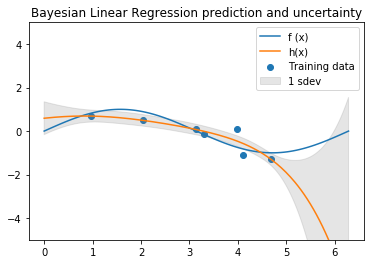

In [11]:
n_pol = 5
x,t = gen_sinusoidal_norm(n=7, seed=None, sdev=0.4)
clf = BayesianRegression()
clf.fit(create_design_matrix(n_pol, x), t,.5, 1/(0.2**2))
x_pred = np.linspace(0, 2*np.pi, 200)
y, var = clf.predict(create_design_matrix(n_pol, x_pred))
sdev = np.sqrt(var.diagonal())

# Plot
x_linspace = np.linspace(0,2*np.pi,100)
fig, ax = plt.subplots()
ax.plot(x_linspace, np.sin(x_linspace), label="f (x)")
ax.scatter(x, t, label="Training data")
ax.plot(x_pred,y, label="h(x)")
ax.fill_between(x_pred, y+sdev, y-sdev, color="grey", 
                alpha=.2, label="1 sdev")
ax.set_ylim(-5,5)
ax.legend()
ax.set_title('Bayesian Linear Regression prediction and uncertainty')
plt.show()

Next, we use the predictive distribution to sample 30 different models (sets of weights) and plot their prediction function. For comparison we also plot the predictive mean.

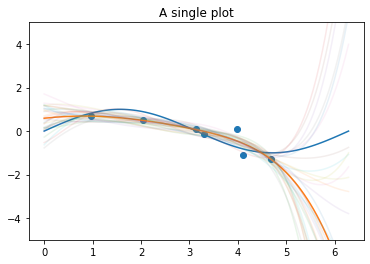

In [12]:
x_linspace = np.linspace(0,2*np.pi,100)
y, var = clf.predict(create_design_matrix(n_pol, x_pred))

fig, ax = plt.subplots()
ax.plot(x_linspace, np.sin(x_linspace), label="f (x)")
ax.plot(x_pred,y, label="h(x)")
ax.scatter(x, t, label="Training data")
ax.set_ylim(-5,5)
ax.set_title('A single plot')

for i in range(30):
    y_random, var = clf.predict(create_design_matrix(n_pol, x_pred), method="random")
    ax.plot(x_pred, y_random, label=i, alpha=.1)